In [1]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
import jinja2
import scipy
from  tqdm import tqdm
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
from nltk.corpus import stopwords

import spacy
import os
from spacy.util import compounding
from spacy.util import minibatch

In [2]:
train = pd.read_csv(r"Data/train.csv")
test = pd.read_csv(r"Data/test.csv")

In [3]:
print(train.shape)
print(test.shape)

(27481, 4)
(3534, 3)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [44]:
train.dropna(inplace=True)

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


In [46]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [47]:
train.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11117


In [48]:
temp = train.groupby('sentiment').count()['text'].reset_index().sort_values(by='text', ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


<Axes: xlabel='sentiment', ylabel='count'>

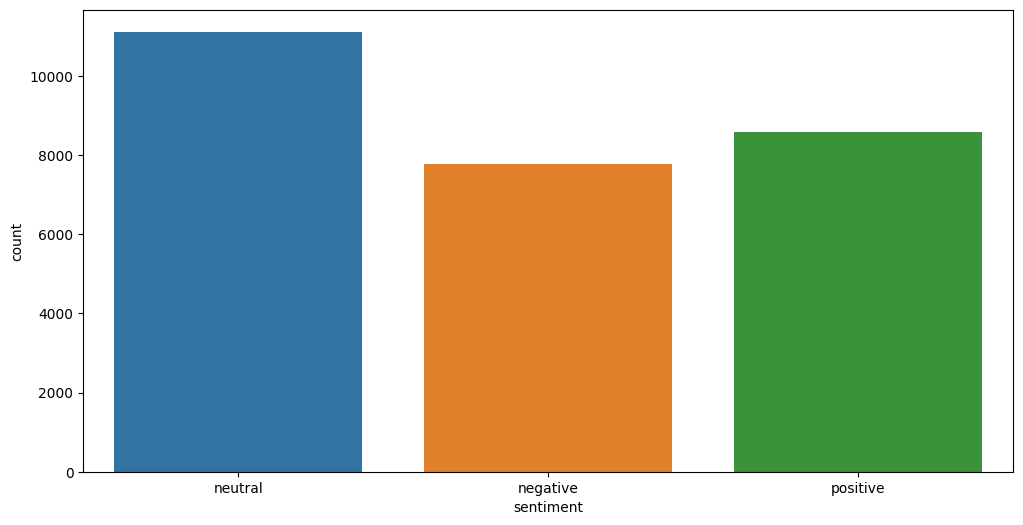

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=train)

In [50]:
train['Num_words_ST'] = train['selected_text'].apply(lambda x:len(str(x).split())) 
train['Num_word_text'] = train['text'].apply(lambda x:len(str(x).split()))
train['difference_in_words'] = train['Num_word_text'] - train['Num_words_ST']

In [51]:
train.head()

,textID,text,selected_text,sentiment,Num_words_ST,Num_word_text,difference_in_words
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,7,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,2,10,8
2,088c60f138,my boss is bullying me...,bullying me,negative,2,5,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,3,5,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,3,14,11


In [52]:
hist_data = [train['Num_words_ST'], train['Num_word_text']]

group_labels = ['Selected_Text','Text']

fig = ff.create_distplot(hist_data, group_labels, show_curve=False)
fig.update_layout(title_text='Distribution of Number of words')
fig.update_layout(autosize=False,
width=900,
height=700,
paper_bgcolor='LightSteelBlue',)

fig.show()

C:\Users\Surbhit Kumar\AppData\Local\Temp\ipykernel_16320\1923648379.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Surbhit Kumar\AppData\Local\Temp\ipykernel_16320\1923648379.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




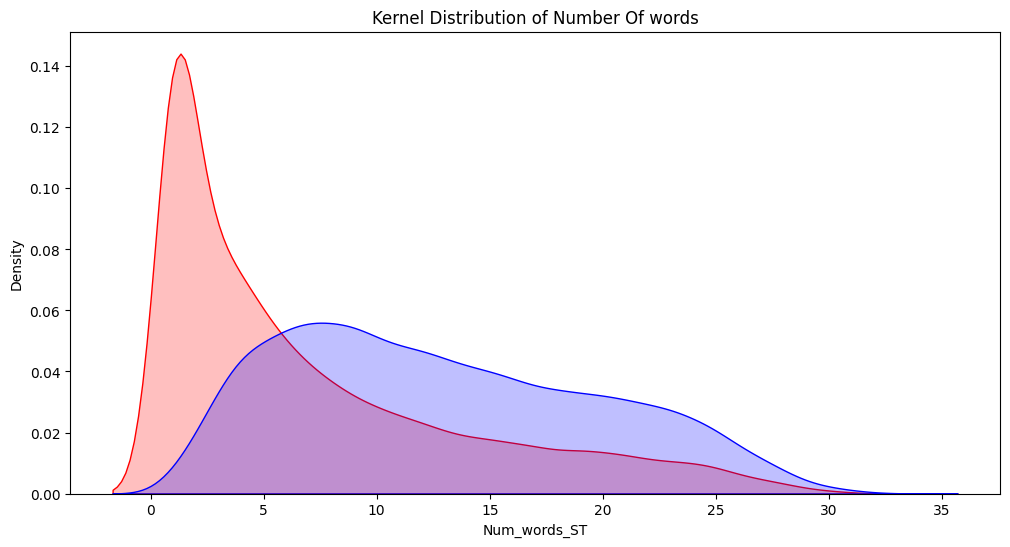

In [53]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train['Num_words_ST'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')
p1=sns.kdeplot(train['Num_word_text'], shade=True, color="b")

C:\Users\Surbhit Kumar\AppData\Local\Temp\ipykernel_16320\828133618.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Surbhit Kumar\AppData\Local\Temp\ipykernel_16320\828133618.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




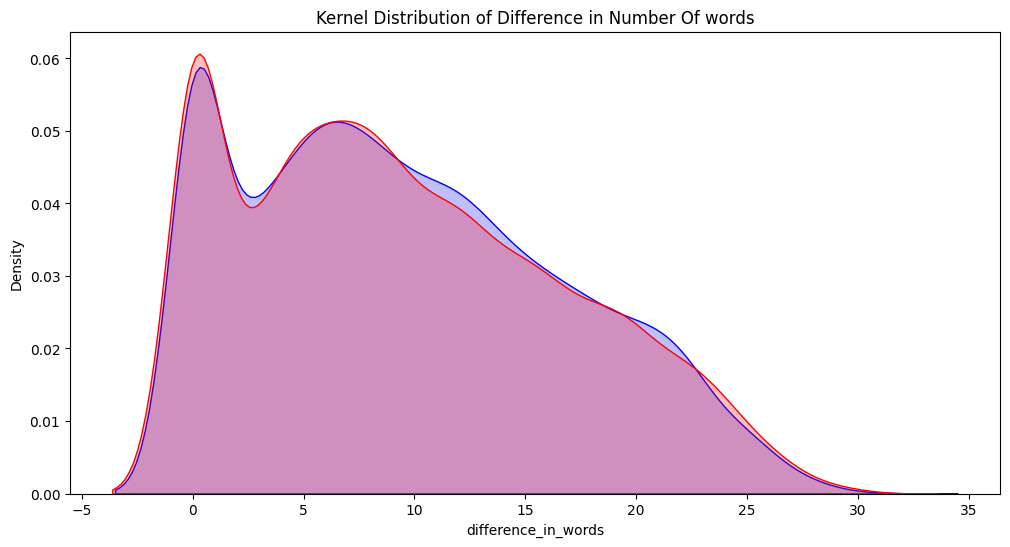

In [54]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train[train['sentiment']=='positive']['difference_in_words'], shade=True, color="b").set_title('Kernel Distribution of Difference in Number Of words')
p2=sns.kdeplot(train[train['sentiment']=='negative']['difference_in_words'], shade=True, color="r")

C:\Users\Surbhit Kumar\AppData\Local\Temp\ipykernel_16320\4062466333.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='difference_in_words', ylabel='Density'>

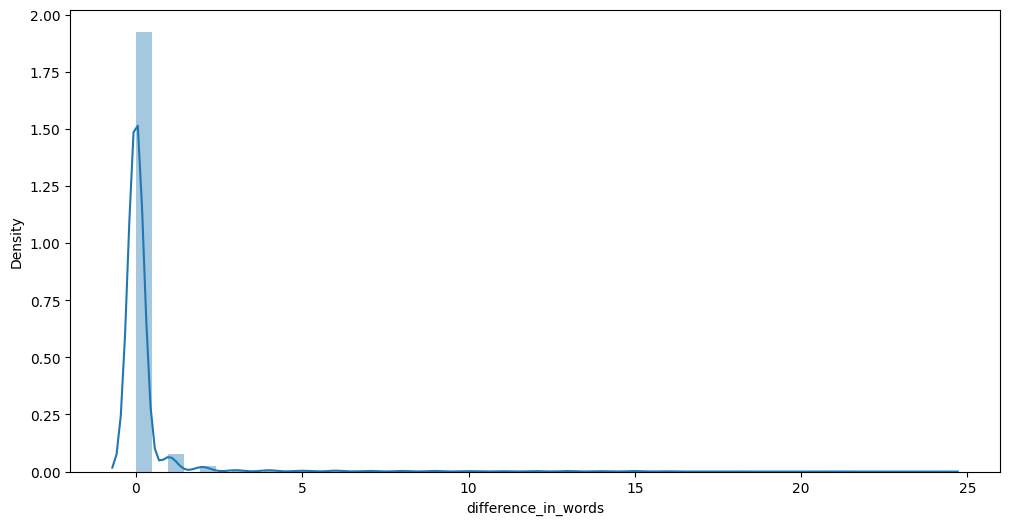

In [55]:
plt.figure(figsize=(12,6))
sns.distplot(train[train['sentiment']=='neutral']['difference_in_words'],kde=True)

In [56]:
def get_jaccard_score(str1, str2):
    a = set(str1.lower().split())
    b = set(str2.lower().split())
    c = a.intersection(b)

    return float(len(c)) / (len(a) + len(b) - len(c))

In [57]:
results_jaccard=[]

for ind,row in train.iterrows():
    sentence1 = row.text
    sentence2 = row.selected_text

    jaccard_score = get_jaccard_score(sentence1,sentence2)
    results_jaccard.append([sentence1,sentence2,jaccard_score])

In [58]:
jaccard = pd.DataFrame(results_jaccard,columns=["text","selected_text","jaccard_score"])
train = train.merge(jaccard,how='outer')

In [59]:
jaccard

,text,selected_text,jaccard_score
0,"I`d have responded, if I were going","I`d have responded, if I were going",1.000000
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0.200000
2,my boss is bullying me...,bullying me,0.166667
3,what interview! leave me alone,leave me alone,0.600000
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0.214286
...,...,...,...
27475,wish we could come see u on Denver husband l...,d lost,0.058824
27476,I`ve wondered about rake to. The client has ...,", don`t force",0.083333
27477,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,0.272727
27478,But it was worth it ****.,But it was worth it ****.,1.000000


C:\Users\Surbhit Kumar\AppData\Local\Temp\ipykernel_16320\3307118441.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Surbhit Kumar\AppData\Local\Temp\ipykernel_16320\3307118441.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




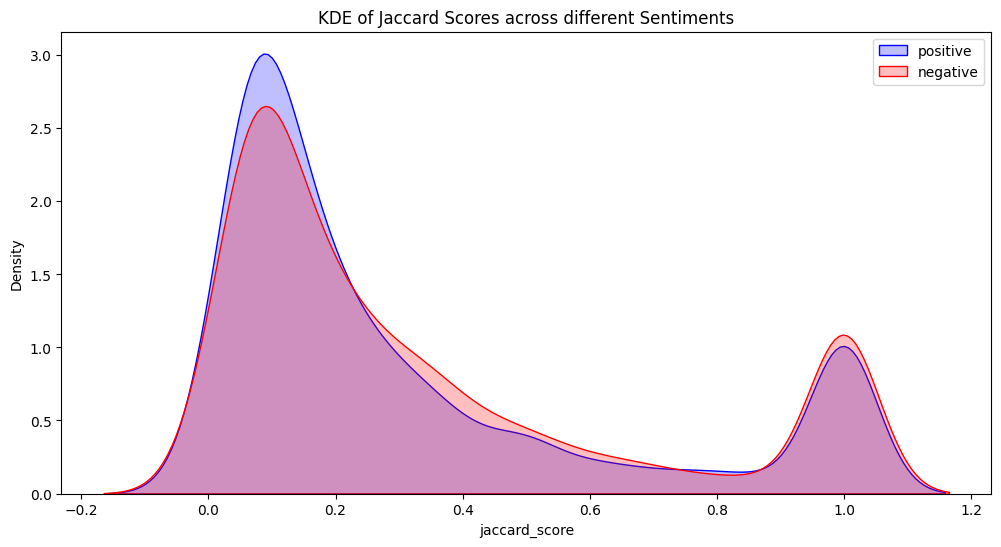

In [60]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train[train['sentiment']=='positive']['jaccard_score'], shade=True, color="b").set_title('KDE of Jaccard Scores across different Sentiments')
p2=sns.kdeplot(train[train['sentiment']=='negative']['jaccard_score'], shade=True, color="r")
plt.legend(labels=['positive','negative'])

C:\Users\Surbhit Kumar\AppData\Local\Temp\ipykernel_16320\1590883980.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='jaccard_score'>

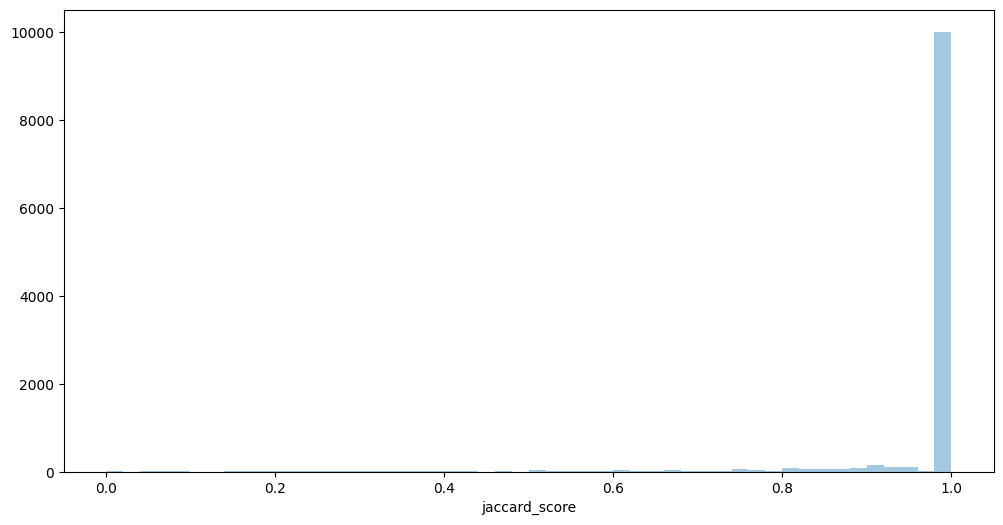

In [61]:
plt.figure(figsize=(12,6))
sns.distplot(train[train['sentiment']=='neutral']['jaccard_score'],kde=False)

In [62]:
k = train[train['Num_word_text']<=2]

In [71]:
k.groupby('sentiment')['jaccard_score'].mean()

sentiment
negative    0.788580
neutral     0.977805
positive    0.765700
Name: jaccard_score, dtype: float64

In [72]:
k[k['sentiment']=='positive']

,textID,text,selected_text,sentiment,Num_words_ST,Num_word_text,difference_in_words,jaccard_score
68,fa2654e730,Chilliin,Chilliin,positive,1,1,0,1.0
80,bbbc46889b,THANK YYYYYYYYYOOOOOOOOOOUUUUU!,THANK YYYYYYYYYOOOOOOOOOOUUUUU!,positive,2,2,0,1.0
170,f3d95b57b1,good morning,good morning,positive,2,2,0,1.0
278,89d5b3f0b5,Thanks,Thanks,positive,1,1,0,1.0
429,a78ef3e0d0,Goodmorning,Goodmorning,positive,1,1,0,1.0
...,...,...,...,...,...,...,...,...
26689,e80c242d6a,Goodnight;,Goodnight;,positive,1,1,0,1.0
26725,aad244f37d,*hug*,*hug*,positive,1,1,0,1.0
26842,a46571fe12,congrats!,congrats!,positive,1,1,0,1.0
26959,49a942e9b1,Happy birthday.,Happy birthday.,positive,2,2,0,1.0


In [73]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [74]:
train['text'] = train['text'].apply(lambda x:clean_text(x))
train['selected_text'] = train['selected_text'].apply(lambda x:clean_text(x))

In [75]:
train.head()

,textID,text,selected_text,sentiment,Num_words_ST,Num_word_text,difference_in_words,jaccard_score
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,7,7,0,1.000000
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,2,10,8,0.200000
2,088c60f138,my boss is bullying me,bullying me,negative,2,5,3,0.166667
3,9642c003ef,what interview leave me alone,leave me alone,negative,3,5,2,0.600000
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative,3,14,11,0.214286


Common Words in selected texts

In [76]:
train['temp_list'] = train['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,i,7200
1,to,5305
2,the,4590
3,a,3538
4,my,2783
5,you,2624
6,and,2321
7,it,2158
8,is,2115
9,in,1986


In [77]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

We'll remove the stopwords and observe again.

In [84]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
    
train['temp_list'] = train['temp_list'].apply(lambda x:remove_stopword(x))

In [85]:
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,im,1676
1,good,1251
2,day,1058
3,love,909
4,happy,852
5,like,774
6,get,772
7,dont,765
8,go,700
9,cant,613


In [86]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

Common words in text

In [87]:
train['temp_list1'] = train['text'].apply(lambda x:str(x).split()) 
train['temp_list1'] = train['temp_list1'].apply(lambda x:remove_stopword(x)) 

In [88]:
top = Counter([item for sublist in train['temp_list1'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,day,2044
2,good,1549
3,get,1426
4,like,1346
5,go,1267
6,dont,1200
7,love,1122
8,work,1112
9,going,1096
10,today,1096


In [89]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

Common words sentiment wise

In [90]:
Positive_sent = train[train['sentiment']=='positive']
Negative_sent = train[train['sentiment']=='negative']
Neutral_sent = train[train['sentiment']=='neutral']

In [91]:
#Most common positive words

top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,good,826
1,happy,730
2,love,697
3,day,456
4,thanks,439
5,great,364
6,fun,287
7,nice,267
8,mothers,259
9,hope,245


In [93]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most common positive words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [94]:
#Most common negative words

top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
0,im,452
1,miss,358
2,sad,343
3,sorry,300
4,bad,246
5,hate,230
6,dont,221
7,cant,201
8,sick,166
9,like,162


In [96]:
fig = px.bar(temp_negative, x="count", y="Common_words", title='Most common negative words', orientation='h', width=700, height=700,color='Common_words')
fig.show()

In [97]:
#Most common neutral words

top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Purples')

,Common_words,count
0,im,1039
1,get,612
2,go,569
3,day,492
4,dont,482
5,going,472
6,work,467
7,like,445
8,got,441
9,today,427


In [105]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most common neutral words', orientation='h', width=700, height=700,color='Common_words')
fig.show()

In [103]:
n_neutral = temp_neutral['Common_words'].tolist()
n_positive = temp_positive['Common_words'].tolist()
n_negative = temp_negative['Common_words'].tolist()

In [104]:
common = set(n_neutral).intersection(n_positive).intersection(n_negative)
list(common)

['im', 'day', 'like']

Unique words in each segment

In [112]:
raw_text = [word for word_list in train['temp_list1'] for word in word_list]

In [118]:
def words_unique(sentiment,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''

    '''
    Getting the list of words in temp_list1 for all sentiments other than the provided one
    '''

    allother = []
    for item in train[train.sentiment != sentiment]['temp_list1']:
        for word in item:
            allother.append(word)
    allother  = list(set(allother))
    
    '''
    Getting the list of words apart from the ones present in allother
    '''
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in train[train.sentiment == sentiment]['temp_list1']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

In [119]:
#Getting unique positive words
Unique_Positive= words_unique('positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


,words,count
0,congratulations,29
1,thnx,10
2,appreciated,8
3,shared,7
4,presents,7
5,greetings,7
6,blessings,6
7,mothersday,6
8,mcr,6
9,coolest,6


In [120]:
fig = px.treemap(Unique_Positive, path=['words'], values='count',title='Tree Of Unique Positive Words')
fig.show()

In [121]:
#Getting unique negative words
Unique_Negative= words_unique('negative', 20, raw_text)
print("The top 20 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 20 unique words in Negative Tweets are:


,words,count
0,ache,12
1,suffering,9
2,allergic,7
3,cramps,7
4,saddest,7
5,pissing,7
6,sob,6
7,dealing,6
8,devastated,6
9,noes,6


In [122]:
fig = px.treemap(Unique_Negative, path=['words'], values='count',title='Tree Of Unique Negative Words')
fig.show()

In [123]:
#Getting unique neutral words
Unique_Neutral= words_unique('neutral', 20, raw_text)
print("The top 20 unique words in Neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='Purples')

The top 20 unique words in Neutral Tweets are:


,words,count
0,settings,9
1,explain,7
2,mite,6
3,hiya,6
4,reader,5
5,pr,5
6,sorta,5
7,fathers,5
8,enterprise,5
9,guessed,5


In [124]:
fig = px.treemap(Unique_Neutral, path=['words'], values='count',title='Tree Of Unique Neutral Words')
fig.show()

Modelling

In [125]:
df_train = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')

In [126]:
df_train['Num_words_text'] = df_train['text'].apply(lambda x:len(str(x).split()))

In [128]:
df_train = df_train[df_train['Num_words_text']>=3]

### Modelling - LSTM

In [209]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import re

In [210]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [211]:
train = train[['text','sentiment']]
test = test[['text','sentiment']]

In [212]:
#Preprocessing text
train['text'] = train['text'].apply(lambda x: str(x).lower())
train['text'] = train['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [213]:
train['sentiment'].value_counts()
#train['sentiment'].value_counts()/train.shape[0]

sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64

In [214]:
#Keeping only positive and negative sentences for this example
train = train[train['sentiment'] != 'neutral']
test = test[test['sentiment'] != 'neutral']

In [223]:
max_features = 3000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(train['text'].values)
X = tokenizer.texts_to_sequences(train['text'].values)
X = pad_sequences(X)

In [224]:
X[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    5, 1336,    9,   17])

In [225]:
train['text'].iloc[1]

'my boss is bullying me'

In [226]:
embed_dim = 128
lstm_out = 196

model_lstm = Sequential()
model_lstm.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model_lstm.add(SpatialDropout1D(0.4))
model_lstm.add(LSTM(lstm_out, dropout=0.4, recurrent_dropout=0.2))
model_lstm.add(Dense(2,activation='softmax'))
model_lstm.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model_lstm.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 32, 128)           384000    
                                                                 
 spatial_dropout1d_3 (Spati  (None, 32, 128)           0         
 alDropout1D)                                                    
                                                                 
 lstm_9 (LSTM)               (None, 196)               254800    
                                                                 
 dense_9 (Dense)             (None, 2)                 394       
                                                                 
Total params: 639194 (2.44 MB)
Trainable params: 639194 (2.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [227]:
Y = pd.get_dummies(train['sentiment']).values

In [228]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.33, random_state=42)

In [229]:
X_val.shape

(5400, 32)

In [230]:
batch_size = 32
epochs=50



callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.05,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)



history_lstm = model_lstm.fit(X_train, Y_train,
                      validation_data=(X_val,Y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1, callbacks = callback)

Epoch 1/50
343/343 [==============================] - 242s 700ms/step - loss: 0.4582 - accuracy: 0.7719 - val_loss: 0.3166 - val_accuracy: 0.8637
Epoch 2/50
343/343 [==============================] - 242s 706ms/step - loss: 0.2848 - accuracy: 0.8823 - val_loss: 0.3101 - val_accuracy: 0.8706
Epoch 3/50
343/343 [==============================] - 243s 708ms/step - loss: 0.2381 - accuracy: 0.9030 - val_loss: 0.3083 - val_accuracy: 0.8706
Epoch 4/50
343/343 [==============================] - 240s 701ms/step - loss: 0.2039 - accuracy: 0.9207 - val_loss: 0.3227 - val_accuracy: 0.8674
Epoch 5/50
343/343 [==============================] - 240s 701ms/step - loss: 0.1776 - accuracy: 0.9309 - val_loss: 0.3309 - val_accuracy: 0.8670
Epoch 6/50
343/343 [==============================] - 239s 696ms/step - loss: 0.1533 - accuracy: 0.9426 - val_loss: 0.3772 - val_accuracy: 0.8630


Evaluating on the test set

In [231]:
X_test = tokenizer.texts_to_sequences(test['text'].values)
X_test = pad_sequences(X_test, maxlen=32)

In [232]:
Y_test = pd.get_dummies(test['sentiment']).values

In [233]:
score,accuracy = model_lstm.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("accuracy: %.2f" % (accuracy))

66/66 - 13s - loss: 0.3223 - accuracy: 0.8874 - 13s/epoch - 203ms/step
score: 0.32
accuracy: 0.89


In [256]:
#sentence = ['wow this is amazing']
sentence = ['It was not a good day']

In [257]:

sentence = tokenizer.texts_to_sequences(sentence)

sentence = pad_sequences(sentence, maxlen=32, dtype='int32', value=0)

sentiment = model_lstm.predict(sentence,batch_size=1,verbose = 2)[0]

if(np.argmax(sentiment) == 0):
    print(round(sentiment[0]*100,0),"%")
    print("negative")
elif (np.argmax(sentiment) == 1):
    print(round(sentiment[1]*100,0),"%")
    print("positive")

1/1 - 0s - 96ms/epoch - 96ms/step
88.0 %
negative


In [259]:
import pickle

#Saving model and tokenizer
model_lstm.save("../SentimentAnalysis_lstm.keras")

with open('../SentimentAnalysis_tokenizer.pickle', 'wb') as file_tok:
    pickle.dump(tokenizer, file_tok, protocol=pickle.HIGHEST_PROTOCOL)